In [14]:
import os
# 根据自己项目的位置选择工作路径
os.chdir('..\\..\\..\\..\\..\\JAVA\\chinese-medicine-identification\\image-cnn-model\\')

/Users/com.xiaohao/Documents/Java/chinese-medicine-identification/image-cnn-model


In [15]:
model_dir = 'resources/keras-model/'

/Users/com.xiaohao/Documents/Java/chinese-medicine-identification/image-cnn-model
resources/keras-model/


In [4]:
import keras
img_size = (299, 299)
dataset_dir = '..\\..\\..\\datasets\\dataset'
img_save_to_dir = 'resources\\image-traing\\'
log_dir = 'resources\\train-log'

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    width_shift_range=0.4,
    height_shift_range=0.4,
    rotation_range=90,
    zoom_range=0.7,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=keras.applications.xception.preprocess_input)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255,
    preprocessing_function=keras.applications.xception.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    save_to_dir=img_save_to_dir,
    target_size=img_size,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    dataset_dir,
    save_to_dir=img_save_to_dir,
    target_size=img_size,
    class_mode='categorical')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=7, mode='auto', factor=0.2)

tensorboard = keras.callbacks.tensorboard_v2.TensorBoard(log_dir=log_dir)


FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\..\\datasets\\dataset'

In [16]:
import keras

model=keras.models.load_model(model_dir+'chinese_medicine_model_v1.0.h5')

for layer in model.layers:
    layer.trainable = False
for layer in model.layers[-9:]:
    layer.trainable = True
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples // train_generator.batch_size,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples // validation_generator.batch_size,
                              callbacks=[early_stop, reduce_lr, tensorboard])
model.save(model_dir + 'chinese_medicine_model_v2.0.h5')



In [10]:
def save_file(str):
    with open('resources\\model_info\\model_summary.txt','a+',encoding='utf8') as f:
        f.write(str+'\n')
        f.close()
    
keras.utils.print_summary(model,print_fn=save_file)


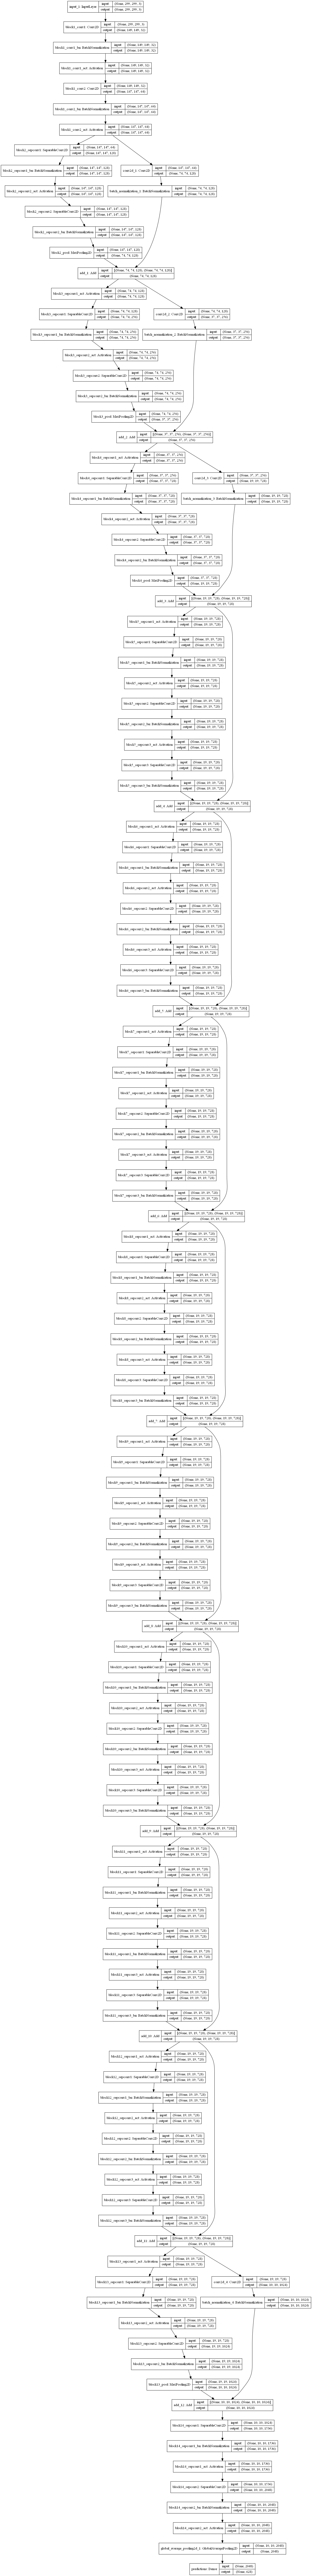

In [11]:
keras.utils\
    .plot_model(model, to_file='resources\\model_info\\model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [17]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________